
# Logical model representing the behavior of epithelial cells under the cytokine environment at the chronic stage of Inflammatory Bowel Disease (IBD)

This notebook is created for the analysis of the Inflammatory Bowel Disease (IBD) model representing intracellular pathways in Intestinal Epithelial Cells (IEC) during the chronic phase of the disease.


### Import packages

First, necessary tools need to be imported for performing the analysis. (In addtion to some settings to obtain nice-looking tables)

In [1]:
import ginsim 
import csv
import biolqm
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)


#Hide FutureWarning from Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

## The IBD Epithelial Cell logical model

The logical model represents the behavior of intestinal epithelial cells during the chronic stage of inflammatory bowel disease in response to the main cytokines and pathogen related-entities present in the local environment. 

The main cytokines that account for the characteristic cytokine milieu are TNF and IFNg (namely derived from Th1 cells), and IL-17 and IL-22 (namely derived from Th17 cells). Pathways activated by these cytokines are acquired from the psoKC (psoriatic keratinocyte) model created by Eirini Tsirvouli. However, the signalling molecules in the IBD-IEC model involved in these pathways may differ from the ones in the psoKC model.

Moreover, since microbial dysbiosis play an important role in development and relapse of IBD, some bacterial components are added (LPS, PGN and MDP)  as inputs which triggers the activation of toll-like receptors and their downstream pathways. Type I and III interferon signalling also added since several of the IBD-associated genes are also involved in these pathways (e.g. JAK2, TYK2, STAT1).


### Load and visualize network

In [2]:
gs_model = ginsim.load("IBD_logical_model.zginml")

print(' Figure 1. The logical model of Intestinal Epithelial cells during the chronic phase of IBD')



#ginsim.show(gs_model)

 Figure 1. The logical model of Intestinal Epithelial cells during the chronic phase of IBD


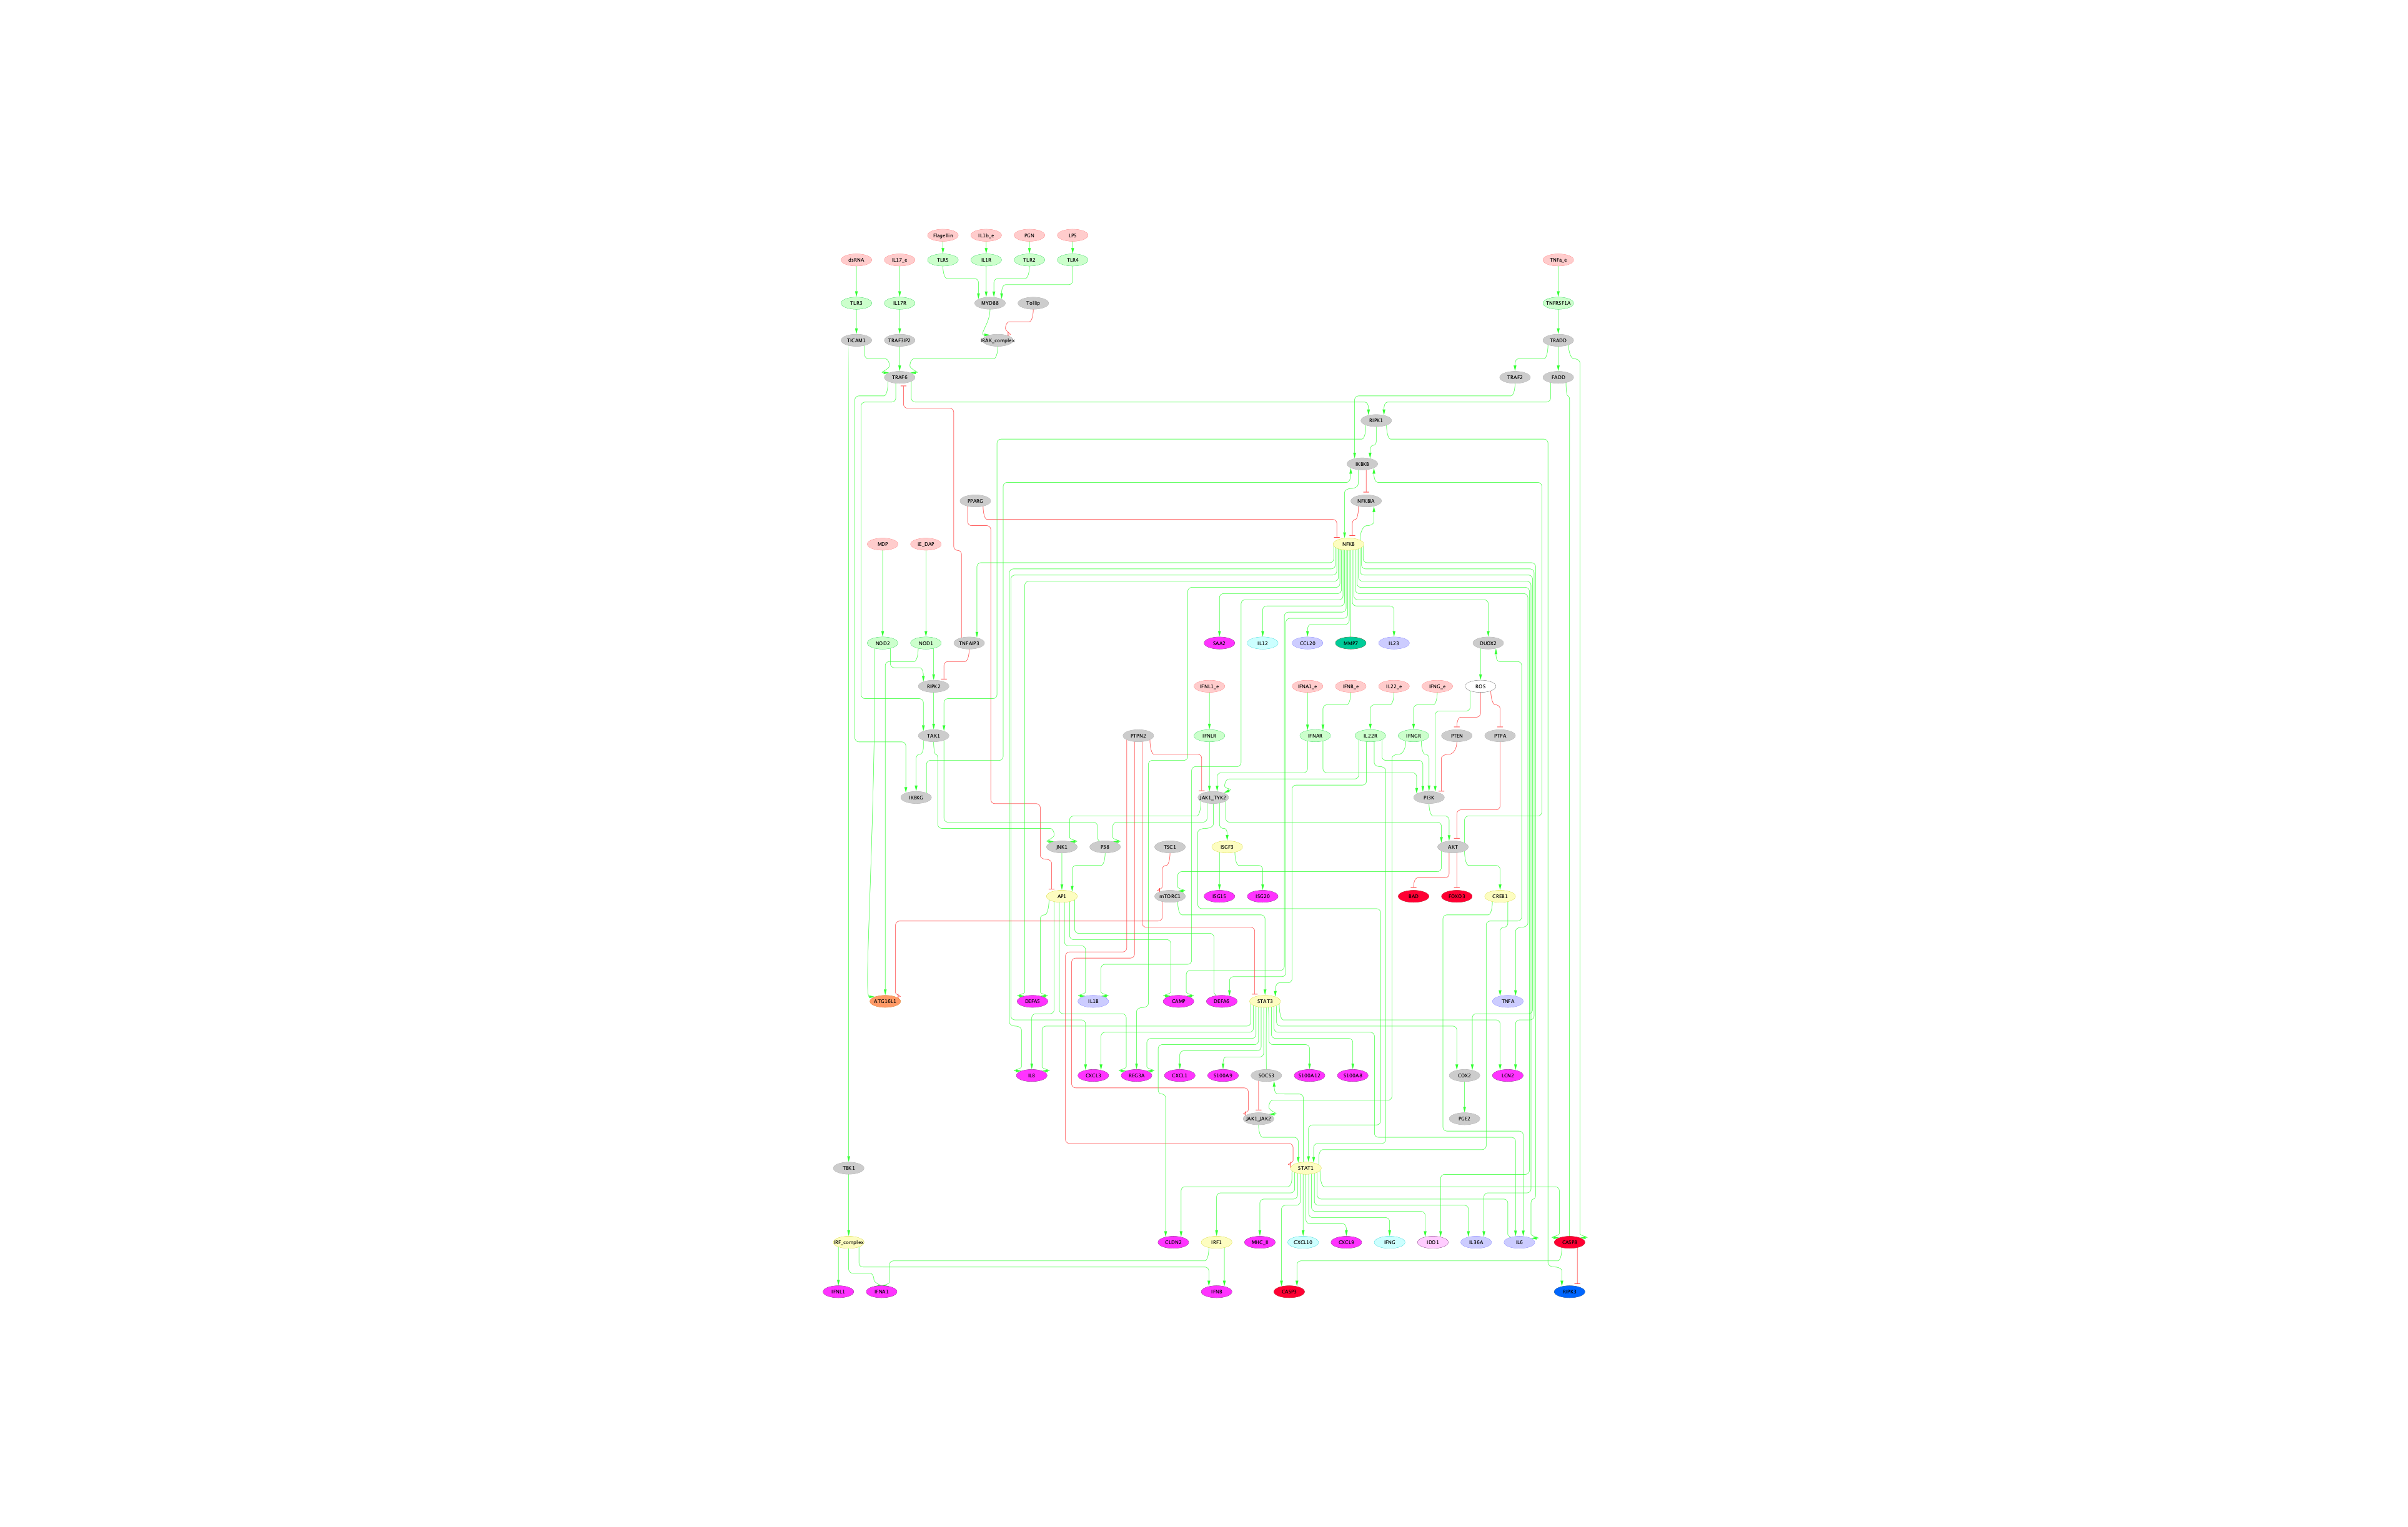

### Convert model to different formats


For further analysis it is necessary to convert the GINsim model to other formats (bioLQM and Pint)


In [3]:
lqm_model = ginsim.to_biolqm(gs_model)
pint_model = biolqm.to_pint(lqm_model)

Acquire a summary of the general model properties with Pint:

In [4]:
print('Table 1. Summary of general model properties')
pint_model.summary()

Table 1. Summary of general model properties


{'nb_automata': 106,
 'nb_local_states': 212,
 'max_local_states': 2,
 'nb_transitions': 262,
 'nb_states': 81129638414606681695789005144064}

## Node-phenotype associations


The model consist of 6 marker nodes associated with three disregulated phenotypes of IBD-IECs: Apoptosis, Necroptosis and Authophagy. Additionally, 30 marker nodes are associated with the activation, recruitment and maintanance of three subpopulations of immune cells: Th1, Th17/22, Treg and other immune cells, mainly referring to Neutrophiles. At last, one of the markers is associated with tissue repair. The association between nodes and phenotypes are shown in the table below:  


In [5]:
print('Table 2. Association between markers and their respective phenotype')

Node_phenotype = {"Node": ['BAD', 'CASP3', 'CASP8', 'FOXO3', 'RIPK3', 'ATG16L1', 'CLDN2', 'CXCL1', 'CXCL9', 'CXCL3', 'IL8', 'IFNL1', 'IFNA1', 'SAA2', 'DEFA6', 'DEFA5', 'CAMP','IFNB', 'ISG15', 'S100A12', 'LCN2', 'ISG20', 'REG3A' , 'S100A8', 'S100A9', 'MHC_II', 'IFNG', 'CXCL10', 'IL12', 'CCL20','IL1B', 'IL23', 'IL36A', 'IL6', 'TNF','IDO1', 'MMP7'], 
                  "Main Phenotype": ['Apoptosis', 'Apoptosis', 'Apoptosis','Apoptosis', 'Necroptosis', 'Autophagy' , 'Immune cells' , 'Immune cells', 'Immune cells', 'Immune cells' , 'Immune cells' , 'Immune cells','Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Immune cells', 'Immune cells', 'Immune cells','Immune cells','Immune cells','Immune cells','Immune cells','Immune cells','Th1', 'Th1', 'Th1', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Treg', 'Tissue repair']}

df_phen = pd.DataFrame(data=Node_phenotype)
df_phen.style.hide_index()

Table 2. Association between markers and their respective phenotype


Node,Main Phenotype
BAD,Apoptosis
CASP3,Apoptosis
CASP8,Apoptosis
FOXO3,Apoptosis
RIPK3,Necroptosis
ATG16L1,Autophagy
CLDN2,Immune cells
CXCL1,Immune cells
CXCL9,Immune cells
CXCL3,Immune cells


## Identification of attractors (bioLQM)


In [5]:
#Define input conditions

inpTNF = ('IL22R == 0 & IL17R == 0 & TNFRSF1A == 1 & IFNGR == 0 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 0')
inpTNF_IL17 = ('IL22R == 0 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 0 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 0 ')
inpcocktail = ('IL22R == 1 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 1 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 1 & IFNLR == 0')
inpIFNs = ('IL22R == 0 & IL17R == 0 & TNFRSF1A == 0 & IFNGR == 1 & IFNAR == 1 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 1')
inpALL = ('IL22R == 1 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 1 & IFNAR == 1 & NOD1 == 1 & NOD2 == 1 & TLR3 == 1 & TLR2 == 1 & TLR4 == 1 & TLR5 == 1 & IL1R == 1 & IFNLR == 1')


#Prepare indexes with only output nodes

markers = ['BAD', 'CASP3', 'CASP8', 'FOXO3', 'RIPK3', 'ATG16L1', 'CLDN2', 'CXCL1', 'CXCL9', 'CXCL3', 'IL8', 'IFNL1', 'IFNA1', 'SAA2', 'DEFA6', 'DEFA5', 'CAMP','IFNB', 'ISG15', 'ISG20', 'S100A12', 'LCN2', 'REG3A' , 'S100A8', 'S100A9', 'MHC_II', 'IFNG', 'CXCL10', 'IL12', 'CCL20','IL1B', 'IL23', 'IL36A', 'IL6', 'TNF','IDO1', 'MMP7']
phen_arrays = [[ 'Apoptosis', 'Apoptosis', 'Apoptosis','Apoptosis', 'Necroptosis', 'Autophagy' , 'Immune cells' , 'Immune cells', 'Immune cells', 'Immune cells' , 'Immune cells' ,'Immune cells', 'Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Immune cells', 'Immune cells', 'Immune cells','Immune cells','Immune cells','Immune cells','Immune cells','Immune cells','Th1', 'Th1', 'Th1', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Treg', 'Tissue repair'],
              markers]
infl_markers = ['CLDN2', 'CXCL1', 'CXCL3', 'IL8', 'IFNL1', 'IFNA1', 'DEFA6', 'DEFA5', 'CAMP','IFNB', 'ISG15', 'ISG20', 'S100A12', 'LCN2', 'S100A8', 'S100A9', 'MHC_II', 'IFNG', 'IL12', 'CCL20', 'REG3A' ,'IL1B', 'IL23', 'IL36A', 'IL6', 'TNF']
fate_markers = ['BAD', 'CASP3', 'CASP8', 'FOXO3', 'RIPK3', 'ATG16L1'] 

In [6]:
# Compute stable states
fixpoints = biolqm.fixpoints(lqm_model)
fix_df = pd.DataFrame(fixpoints)


#tabulate(fixpoints)

# Uncomment to save stable states as a csv
# fix_df.to_csv('fixpoints.csv')

### Predictions of the behavvior of IECs in response to various inputs

The following code defines the input conditions of interest (TNF, TNF and IL17, cocktail consisting of IFNg, Il17, IL1b, TNF and IL22, and type I, II and III interferon response), and the resulting state of the markers.

In [8]:
# Set initial states
# Select only output nodes to show
# Create a multilevel index with phenotypes
# Show prediction results for the defined input

TNF_fp = fix_df.query(inpTNF) 
TNF_fp = TNF_fp[markers] 
TNF_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 2. Pedricted states with TNF present')

TNF_fp

Figure 2. Pedricted states with TNF present


Phenotype Apoptosis                   Necroptosis Autophagy Immune cells  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1        CLDN2   
9                 0     1     1     0           0         0            1   

Phenotype                                                                     \
Node      CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
9             1     0     1   1     0     0    1     1     1    1    0     0   

Phenotype                                                Th1              \
Node      ISG20 S100A12 LCN2 REG3A S100A8 S100A9 MHC_II IFNG CXCL10 IL12   
9             0       1    1     1      1      1      0    0      0    1   

Phenotype Th17/22                         Treg Tissue repair  
Node        CCL20 IL1B IL23 IL36A IL6 TNF IDO1          MMP7  
9               1    1    1     1   1   1    1             1

In [9]:
TNF_IL17_fp = fix_df.query(inpTNF_IL17) 
TNF_IL17_fp = TNF_IL17_fp[markers] 
TNF_IL17_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 3. Pedricted states with TNF and IL17 present')


TNF_IL17_fp

Figure 3. Pedricted states with TNF and IL17 present


Phenotype Apoptosis                   Necroptosis Autophagy Immune cells  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1        CLDN2   
13                0     1     1     0           0         0            1   

Phenotype                                                                     \
Node      CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
13            1     0     1   1     0     0    1     1     1    1    0     0   

Phenotype                                                Th1              \
Node      ISG20 S100A12 LCN2 REG3A S100A8 S100A9 MHC_II IFNG CXCL10 IL12   
13            0       1    1     1      1      1      0    0      0    1   

Phenotype Th17/22                         Treg Tissue repair  
Node        CCL20 IL1B IL23 IL36A IL6 TNF IDO1          MMP7  
13              1    1    1     1   1   1    1             1

In [10]:
cocktail_fp = fix_df.query(inpcocktail) 
cocktail_fp = cocktail_fp[markers] 
cocktail_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 4. Pedricted states with cocktail stimulation')


cocktail_fp

Figure 4. Pedricted states with cocktail stimulation


Phenotype Apoptosis                   Necroptosis Autophagy Immune cells  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1        CLDN2   
715               0     1     1     0           0         0            1   

Phenotype                                                                     \
Node      CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
715           1     1     1   1     0     1    1     1     1    1    1     1   

Phenotype                                                Th1              \
Node      ISG20 S100A12 LCN2 REG3A S100A8 S100A9 MHC_II IFNG CXCL10 IL12   
715           1       1    1     1      1      1      1    1      1    1   

Phenotype Th17/22                         Treg Tissue repair  
Node        CCL20 IL1B IL23 IL36A IL6 TNF IDO1          MMP7  
715             1    1    1     1   1   1    1             1

In [11]:
IFNs_fp = fix_df.query(inpIFNs) 
IFNs_fp = IFNs_fp[markers] 
IFNs_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 5. Pedricted states with type I, II and III interferon present')

IFNs_fp = IFNs_fp.drop_duplicates()
IFNs_fp

Figure 5. Pedricted states with type I, II and III interferon present


Phenotype Apoptosis                   Necroptosis Autophagy Immune cells  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1        CLDN2   
44                0     1     1     0           0         0            1   

Phenotype                                                                     \
Node      CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
44            1     1     1   1     0     1    1     1     1    1    1     1   

Phenotype                                                Th1              \
Node      ISG20 S100A12 LCN2 REG3A S100A8 S100A9 MHC_II IFNG CXCL10 IL12   
44            1       1    1     1      1      1      1    1      1    1   

Phenotype Th17/22                         Treg Tissue repair  
Node        CCL20 IL1B IL23 IL36A IL6 TNF IDO1          MMP7  
44              1    1    1     1   1   1    1             1

In [12]:
ALL_fp = fix_df.query(inpALL)
ALL_fp = ALL_fp[markers] 
ALL_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 5. Pedricted states with bacterial components present')


ALL_fp = ALL_fp.drop_duplicates()
ALL_fp

Figure 5. Pedricted states with bacterial components present


Phenotype Apoptosis                   Necroptosis Autophagy Immune cells  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1        CLDN2   
16128             0     1     1     0           0         0            1   

Phenotype                                                                     \
Node      CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
16128         1     1     1   1     1     1    1     1     1    1    1     1   

Phenotype                                                Th1              \
Node      ISG20 S100A12 LCN2 REG3A S100A8 S100A9 MHC_II IFNG CXCL10 IL12   
16128         1       1    1     1      1      1      1    1      1    1   

Phenotype Th17/22                         Treg Tissue repair  
Node        CCL20 IL1B IL23 IL36A IL6 TNF IDO1          MMP7  
16128           1    1    1     1   1   1    1             1

#### Heatmap of stable state analysis results

Figure 6. Results of the stable state analysis 


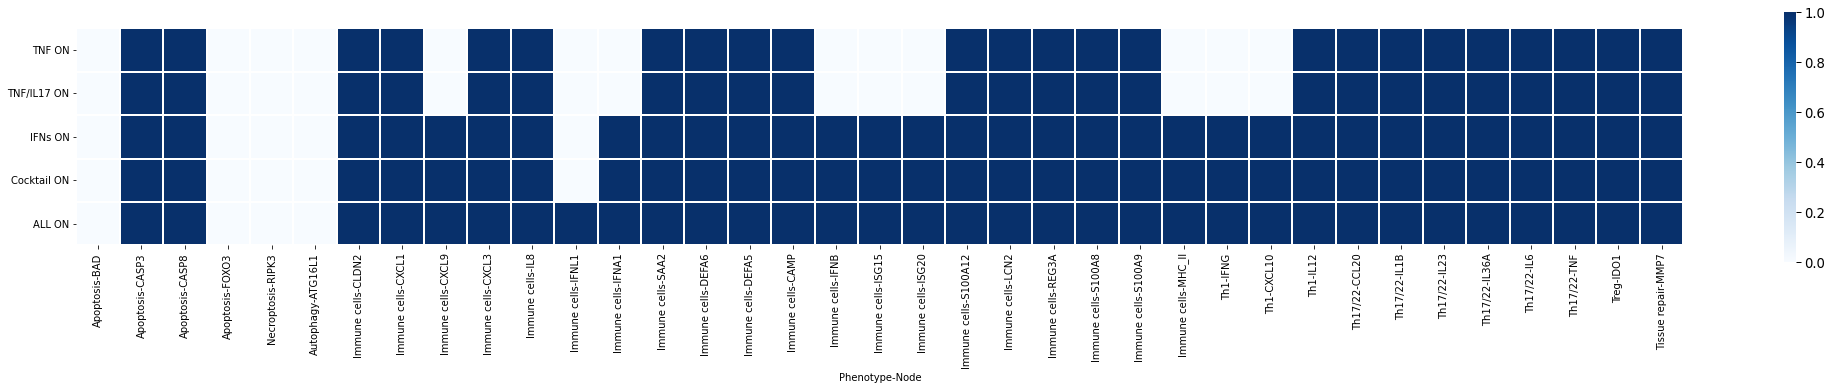

In [14]:
frames = [TNF_fp, TNF_IL17_fp, IFNs_fp, cocktail_fp, ALL_fp]
all_results = pd.concat(frames, keys=["TNF ON","TNF/IL17 ON","IFNs ON", "Cocktail ON", "ALL ON"] )
all_results.index = all_results.index.droplevel(1)

print("Figure 6. Results of the stable state analysis ")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

f = sns.heatmap(all_results, cmap = "Blues", square = True, linewidth=0.3, cbar_kws={"shrink": .1})
#plt.show()
#f.figure.savefig('stable_states.png')

### Heatmap of RNAseq expression data

Figure 7. Heatmap of RNAseq patient expression data


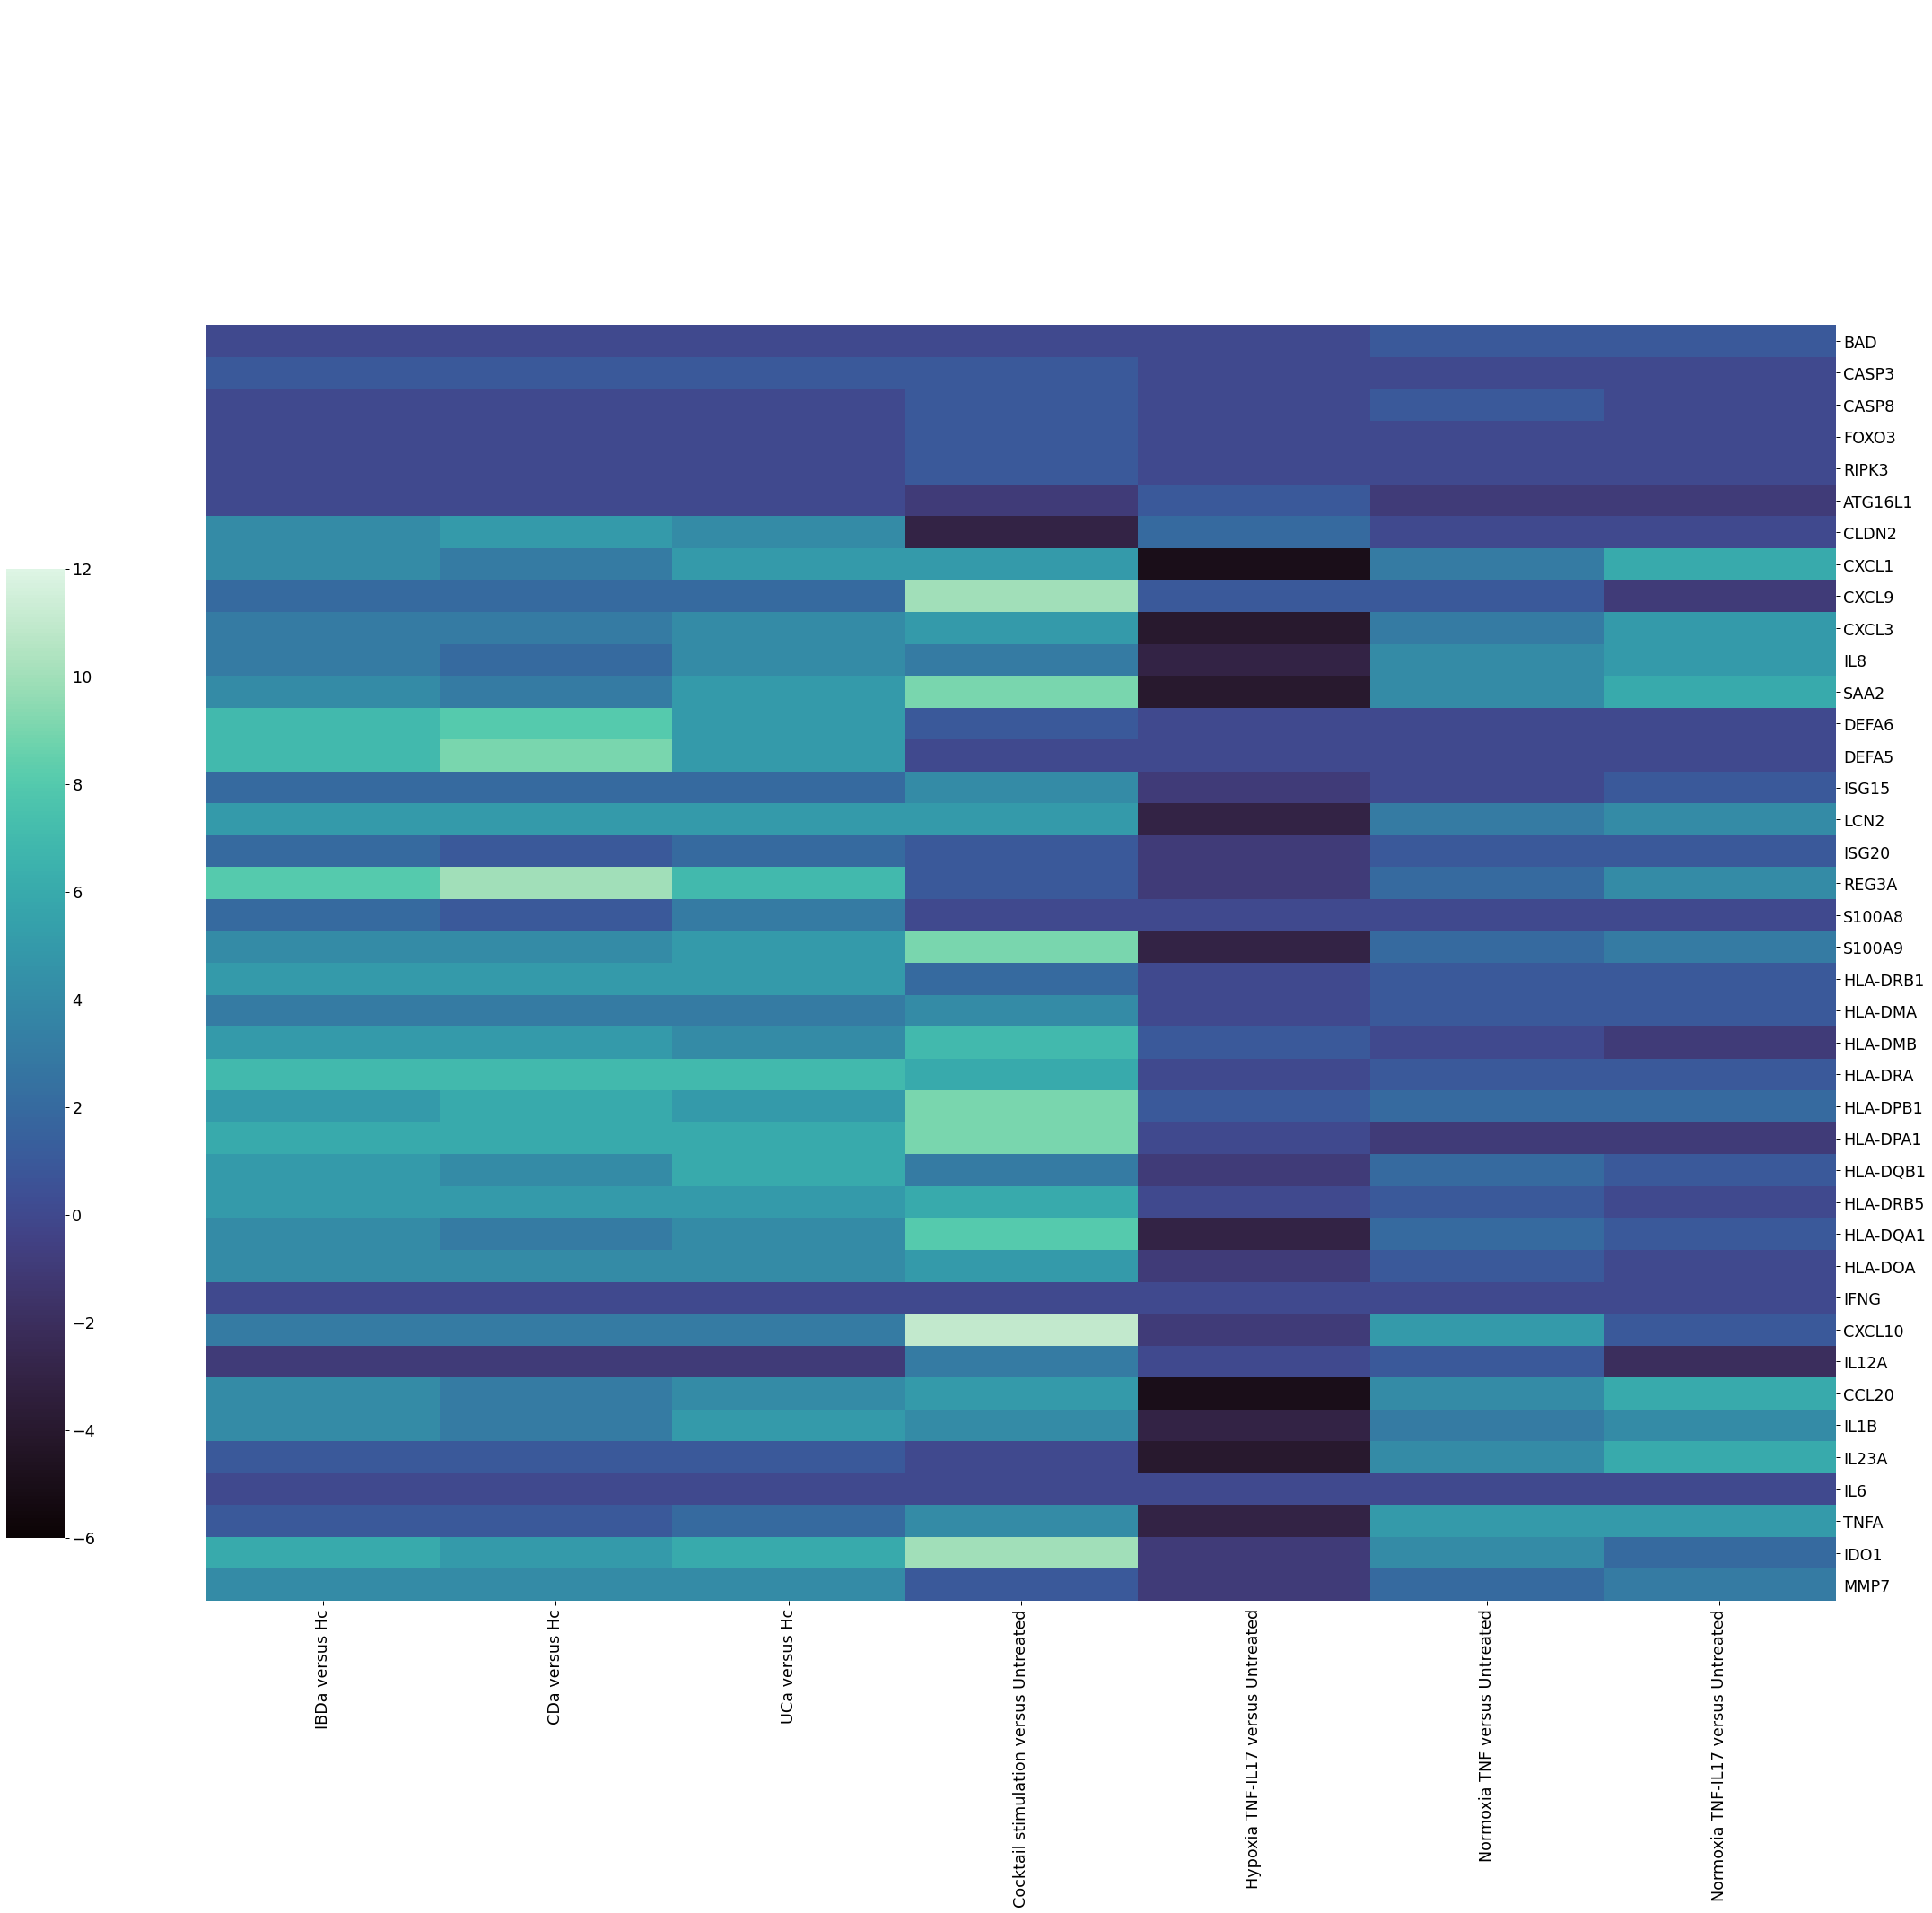

In [15]:

data = []
genes = []

first = True

with open('Expression_data.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter = ';')
    
    for row in csv_reader:
        if first:
            sample_names = row[1:]
            first = False
        
        
        else: 
            genes.append(row[0])
            data.append(row[1:])
            

            
data = np.array(data).astype(int)

print('Figure 7. Heatmap of RNAseq patient expression data')


sns.set_context("paper", font_scale = 2.0)
sns_plot = sns.clustermap(data, xticklabels =sample_names, yticklabels = genes, figsize=(30,30), 
row_cluster=False, col_cluster = False, dendrogram_ratio=(.1, .2), cbar_pos=(0, .2, .03, .5), cmap="mako", vmin=-6, vmax=12)
#sns_plot.savefig("heatmap.pdf")


plt.show()



The heatmap from the RNAseq expression data acquired from patients with IBD, CD and UC shows that most of the markers from the IBD-IEC logical model are upregulated except IL6, IL12A and IFNG. Moreover, the expression of fate markers related to apoptosis and autophagy is not significantly affected during pathogenesis, except for CASP3 which is upregulated. This could indicate that the inflamed environment promotes a casp3-dependent epithelial cell death. Additionally, REG3A, DEFA6 and DEFA5 are more upregulated during CD than UC. These are antimicrobial factors, and therefore indicate that the altered microbiome composition triggers pathways releasing antimicrobial components. In UC, IDO1, S100A9, IL1B, CXCL1 and SAA2 are more upregulated. These are also antimicrobial factors that either attract or are released from innante immune cells, mainly netrophiles and macrophages. Hence, the innate immune cells may have a great impact on the pathogenesis of the collective diseases triggered by the increased number of pro-inflammatory bacteria.  

## Perturbation analysis

In [16]:
#Define perturbations and inputs
anti_TNF = biolqm.perturbation(lqm_model, "TNF_e%0")
anti_JAK2 = biolqm.perturbation(lqm_model, "JAK1_JAK2%0")
COMBO = biolqm.perturbation(lqm_model, "TNF_e%0"  "JAK1_JAK2%0")


The code below performs perturbation simulations in all four conditions (Th17/22, Th1, TH1_17 and PRRs). The defined perturbations are:

- anti_TNF: Inhibition of TNF
- anti_JAK2: Inhibition of JAK2 (Do not want to inhibit signalling throuhg IFNa/b/lambda because of protective properties)
- COMBO: Combination of anti_TNF and anti_JAK2


In [17]:
# Identify all stable states
anti_TNF_fps = biolqm.fixpoints(anti_TNF) 
anti_TNF_fps_df = pd.DataFrame(anti_TNF_fps)

anti_JAK2_fps = biolqm.fixpoints(anti_JAK2)
anti_JAK2_fps_df = pd.DataFrame(anti_JAK2_fps)

COMBO_fps = biolqm.fixpoints(COMBO)
COMBO_fps_df = pd.DataFrame(COMBO_fps)


In [18]:
# Perform perturbation analysis for Th17 cytokines
anti_TNF_TNF_fp = anti_TNF_fps_df.query(inpTNF) 
anti_TNF_TNF = anti_TNF_TNF_fp[markers] 
anti_TNF_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_TNF_df = pd.DataFrame(anti_TNF_TNF)
 
anti_JAK2_TNF_fp = anti_JAK2_fps_df.query(inpTNF) 
anti_JAK2_TNF = anti_JAK2_TNF_fp[markers] 
anti_JAK2_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_TNF_df = pd.DataFrame(anti_JAK2_TNF)

COMBO_TNF_fp = COMBO_fps_df.query(inpTNF)
COMBO_TNF = COMBO_TNF_fp[markers] 
COMBO_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_TNF_df = pd.DataFrame(COMBO_TNF)


frames_TNF = [anti_TNF_TNF_df, anti_JAK2_TNF_df, COMBO_TNF_df]
pert_TNF = pd.concat(frames_TNF, keys=["anti_TNF_TNF", "anti_JAK2_TNF", "COMBO_TNF"])
print("Figure 7. Model states after the in silico treatment of TNF-stimulated IECs")
pert_TNF

Figure 7. Model states after the in silico treatment of TNF-stimulated IECs


Phenotype        Apoptosis                   Necroptosis Autophagy  \
Node                   BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_TNF 10         0     1     1     0           0         0   
COMBO_TNF     9          0     1     1     0           0         0   

Phenotype        Immune cells                                               \
Node                    CLDN2 CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6   
anti_JAK2_TNF 10            1     1     0     1   1     0     0    1     1   
COMBO_TNF     9             1     1     0     1   1     0     0    1     1   

Phenotype                                                                      \
Node             DEFA5 CAMP IFNB ISG15 ISG20 S100A12 LCN2 REG3A S100A8 S100A9   
anti_JAK2_TNF 10     1    1    0     0     0       1    1     1      1      1   
COMBO_TNF     9      1    1    0     0     0       1    1     1      1      1   

Phenotype                Th1             Th17/22                         Treg  \
Node             MHC_II IFNG CXCL10 IL12   CCL20 IL1B IL23 IL36A IL6 TNF IDO1   
anti_JAK2_TNF 10      0    0      0    1       1    1    1     1   1   1    1   
COMBO_TNF     9       0    0      0    1       1    1    1     1   1   1    1   

Phenotype        Tissue repair  
Node                      MMP7  
anti_JAK2_TNF 10             1  
COMBO_TNF     9              1

In [19]:
# Perform perturbation analysis for Th1 cytokines
anti_TNF_TNF_IL17fp = anti_TNF_fps_df.query(inpTNF_IL17) 
anti_TNF_TNF_IL17 = anti_TNF_TNF_IL17fp[markers] 
anti_TNF_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_TNF_IL17_df = pd.DataFrame(anti_TNF_TNF_IL17)
 
anti_JAK2_TNF_IL17_fp = anti_JAK2_fps_df.query(inpTNF_IL17) 
anti_JAK2_TNF_IL17 = anti_JAK2_TNF_IL17_fp[markers] 
anti_JAK2_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_TNF_IL17_df = pd.DataFrame(anti_JAK2_TNF_IL17)

COMBO_TNF_IL17_fp = COMBO_fps_df.query(inpTNF_IL17)
COMBO_TNF_IL17 = COMBO_TNF_IL17_fp[markers] 
COMBO_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_TNF_IL17_df = pd.DataFrame(COMBO_TNF_IL17)


frames_TNF_IL17 = [anti_TNF_TNF_IL17_df, anti_JAK2_TNF_IL17_df, COMBO_TNF_IL17_df]
pert_TNF_IL17 = pd.concat(frames_TNF, keys=["anti_TNF_TNF_IL17", "anti_JAK2_TNF_IL17", "COMBO_TNF_IL17"])
print("Figure 4. Model states after the in silico treatment of  TNF and IL17-stimulated IECs")
pert_TNF_IL17

Figure 4. Model states after the in silico treatment of  TNF and IL17-stimulated IECs


Phenotype             Apoptosis                   Necroptosis Autophagy  \
Node                        BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_TNF_IL17 10         0     1     1     0           0         0   
COMBO_TNF_IL17     9          0     1     1     0           0         0   

Phenotype             Immune cells                                         \
Node                         CLDN2 CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2   
anti_JAK2_TNF_IL17 10            1     1     0     1   1     0     0    1   
COMBO_TNF_IL17     9             1     1     0     1   1     0     0    1   

Phenotype                                                                   \
Node                  DEFA6 DEFA5 CAMP IFNB ISG15 ISG20 S100A12 LCN2 REG3A   
anti_JAK2_TNF_IL17 10     1     1    1    0     0     0       1    1     1   
COMBO_TNF_IL17     9      1     1    1    0     0     0       1    1     1   

Phenotype                                   Th1             Th17/22            \
Node                  S100A8 S100A9 MHC_II IFNG CXCL10 IL12   CCL20 IL1B IL23   
anti_JAK2_TNF_IL17 10      1      1      0    0      0    1       1    1    1   
COMBO_TNF_IL17     9       1      1      0    0      0    1       1    1    1   

Phenotype                           Treg Tissue repair  
Node                  IL36A IL6 TNF IDO1          MMP7  
anti_JAK2_TNF_IL17 10     1   1   1    1             1  
COMBO_TNF_IL17     9      1   1   1    1             1

In [32]:
# Perform perturbation analysis for Th17 cytokines
anti_TNF_IFNs_fp = anti_TNF_fps_df.query(inpIFNs) 
anti_TNF_IFNs = anti_TNF_IFNs_fp[markers] 
anti_TNF_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_IFNs_df = pd.DataFrame(anti_TNF_IFNs)
anti_TNF_IFNs_df = anti_TNF_IFNs_df.drop_duplicates()

 
anti_JAK2_IFNs_fp = anti_JAK2_fps_df.query(inpIFNs) 
anti_JAK2_IFNs = anti_JAK2_IFNs_fp[markers] 
anti_JAK2_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_IFNs_df = pd.DataFrame(anti_JAK2_IFNs)
anti_JAK2_IFNs_df = anti_JAK2_IFNs_df.drop_duplicates()

COMBO_IFNs_fp = COMBO_fps_df.query(inpIFNs)
COMBO_IFNs = COMBO_IFNs_fp[markers] 
COMBO_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_IFNs_df = pd.DataFrame(COMBO_IFNs)
COMBO_IFNs_df = COMBO_IFNs_df.drop_duplicates()


frames_IFNs = [anti_TNF_IFNs_df, anti_JAK2_IFNs_df, COMBO_IFNs_df]
pert_IFNs= pd.concat(frames_IFNs, keys=["anti_TNF_IFNs", "anti_JAK2_IFNs", "COMBO_IFNs"])
print("Figure 7. Model states after the in silico treatment of IFNs-stimulated IECs")
pert_IFNs

Figure 7. Model states after the in silico treatment of IFNs-stimulated IECs


Phenotype         Apoptosis                   Necroptosis Autophagy  \
Node                    BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_TNF_IFNs  36         0     1     1     0           0         0   
anti_JAK2_IFNs 45         0     1     1     0           0         0   
COMBO_IFNs     44         0     1     1     0           0         0   

Phenotype         Immune cells                                               \
Node                     CLDN2 CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6   
anti_TNF_IFNs  36            1     1     1     1   1     0     1    1     1   
anti_JAK2_IFNs 45            1     1     1     1   1     0     1    1     1   
COMBO_IFNs     44            1     1     1     1   1     0     1    1     1   

Phenotype                                                                \
Node              DEFA5 CAMP IFNB ISG15 ISG20 S100A12 LCN2 REG3A S100A8   
anti_TNF_IFNs  36     1    1    1     1     1       1    1     1      1   
anti_JAK2_IFNs 45     1    1    1     1     1       1    1     1      1   
COMBO_IFNs     44     1    1    1     1     1       1    1     1      1   

Phenotype                        Th1             Th17/22                      \
Node              S100A9 MHC_II IFNG CXCL10 IL12   CCL20 IL1B IL23 IL36A IL6   
anti_TNF_IFNs  36      1      1    1      1    1       1    1    1     1   1   
anti_JAK2_IFNs 45      1      1    1      1    1       1    1    1     1   1   
COMBO_IFNs     44      1      1    1      1    1       1    1    1     1   1   

Phenotype             Treg Tissue repair  
Node              TNF IDO1          MMP7  
anti_TNF_IFNs  36   1    1             1  
anti_JAK2_IFNs 45   1    1             1  
COMBO_IFNs     44   1    1             1

In [21]:
# Perform perturbation analysis for Th1 and Th17 cytokines
anti_TNF_cocktail_fp = anti_TNF_fps_df.query(inpcocktail) 
anti_TNF_cocktail = anti_TNF_cocktail_fp[markers] 
anti_TNF_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_cocktail_df = pd.DataFrame(anti_TNF_cocktail)
 
anti_JAK2_cocktail_fp = anti_JAK2_fps_df.query(inpcocktail) 
anti_JAK2_cocktail = anti_JAK2_cocktail_fp[markers] 
anti_JAK2_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_cocktail_df = pd.DataFrame(anti_JAK2_cocktail)

COMBO_cocktail_fp = COMBO_fps_df.query(inpcocktail)
COMBO_cocktail = COMBO_cocktail_fp[markers] 
COMBO_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_cocktail_df = pd.DataFrame(COMBO_cocktail)



frames_cocktail = [anti_TNF_cocktail_df, anti_JAK2_cocktail_df, COMBO_cocktail_df]
pert_cocktail = pd.concat(frames_cocktail, keys=["anti_TNF_cocktail", "anti_JAK2_cocktail", "COMBO_cocktail",])
print("Figure 5. Model states after the in silico treatment of cocktail-stimulated IECs")
pert_cocktail

Figure 5. Model states after the in silico treatment of cocktail-stimulated IECs


Phenotype              Apoptosis                   Necroptosis Autophagy  \
Node                         BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_cocktail 716         0     1     1     0           0         0   
COMBO_cocktail     715         0     1     1     0           0         0   

Phenotype              Immune cells                                         \
Node                          CLDN2 CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2   
anti_JAK2_cocktail 716            1     1     1     1   1     0     1    1   
COMBO_cocktail     715            1     1     1     1   1     0     1    1   

Phenotype                                                                    \
Node                   DEFA6 DEFA5 CAMP IFNB ISG15 ISG20 S100A12 LCN2 REG3A   
anti_JAK2_cocktail 716     1     1    1    1     1     1       1    1     1   
COMBO_cocktail     715     1     1    1    1     1     1       1    1     1   

Phenotype                                    Th1             Th17/22       \
Node                   S100A8 S100A9 MHC_II IFNG CXCL10 IL12   CCL20 IL1B   
anti_JAK2_cocktail 716      1      1      1    1      1    1       1    1   
COMBO_cocktail     715      1      1      1    1      1    1       1    1   

Phenotype                                 Treg Tissue repair  
Node                   IL23 IL36A IL6 TNF IDO1          MMP7  
anti_JAK2_cocktail 716    1     1   1   1    1             1  
COMBO_cocktail     715    1     1   1   1    1             1

In [22]:
# Perform perturbation analysis for PRR signalling
anti_TNF_ALL_fp = anti_TNF_fps_df.query(inpALL) 
anti_TNF_ALL = anti_TNF_ALL_fp[markers] 
anti_TNF_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_ALL_df = pd.DataFrame(anti_TNF_ALL)

 
anti_JAK2_ALL_fp = anti_JAK2_fps_df.query(inpALL) 
anti_JAK2_ALL = anti_JAK2_ALL_fp[markers] 
anti_JAK2_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_ALL_df = pd.DataFrame(anti_JAK2_ALL)
anti_JAK2_ALL_df = anti_JAK2_ALL_df.drop_duplicates()



COMBO_ALL_fp = COMBO_fps_df.query(inpALL)
COMBO_ALL = COMBO_ALL_fp[markers] 
COMBO_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_ALL_df = pd.DataFrame(COMBO_ALL)
COMBO_ALL_df = COMBO_ALL_df.drop_duplicates()



frames_ALL = [anti_TNF_ALL_df, anti_JAK2_ALL_df, COMBO_ALL_df]
pert_ALL = pd.concat(frames_ALL, keys=["anti_TNF_ALL", "anti_JAK2_ALL", "COMBO_ALL"])
print("Figure 6. Model states after the in silico treatment of ALL inputs-stimulated IECs")
pert_ALL

Figure 6. Model states after the in silico treatment of ALL inputs-stimulated IECs


Phenotype           Apoptosis                   Necroptosis Autophagy  \
Node                      BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_ALL 16129         0     1     1     0           0         0   
COMBO_ALL     16128         0     1     1     0           0         0   

Phenotype           Immune cells                                               \
Node                       CLDN2 CXCL1 CXCL9 CXCL3 IL8 IFNL1 IFNA1 SAA2 DEFA6   
anti_JAK2_ALL 16129            1     1     1     1   1     1     1    1     1   
COMBO_ALL     16128            1     1     1     1   1     1     1    1     1   

Phenotype                                                                  \
Node                DEFA5 CAMP IFNB ISG15 ISG20 S100A12 LCN2 REG3A S100A8   
anti_JAK2_ALL 16129     1    1    1     1     1       1    1     1      1   
COMBO_ALL     16128     1    1    1     1     1       1    1     1      1   

Phenotype                          Th1             Th17/22                  \
Node                S100A9 MHC_II IFNG CXCL10 IL12   CCL20 IL1B IL23 IL36A   
anti_JAK2_ALL 16129      1      1    1      1    1       1    1    1     1   
COMBO_ALL     16128      1      1    1      1    1       1    1    1     1   

Phenotype                   Treg Tissue repair  
Node                IL6 TNF IDO1          MMP7  
anti_JAK2_ALL 16129   1   1    1             1  
COMBO_ALL     16128   1   1    1             1

#### Heatmap of global and perturbation simulation results

Figure 7. Global simulation and perturbation results


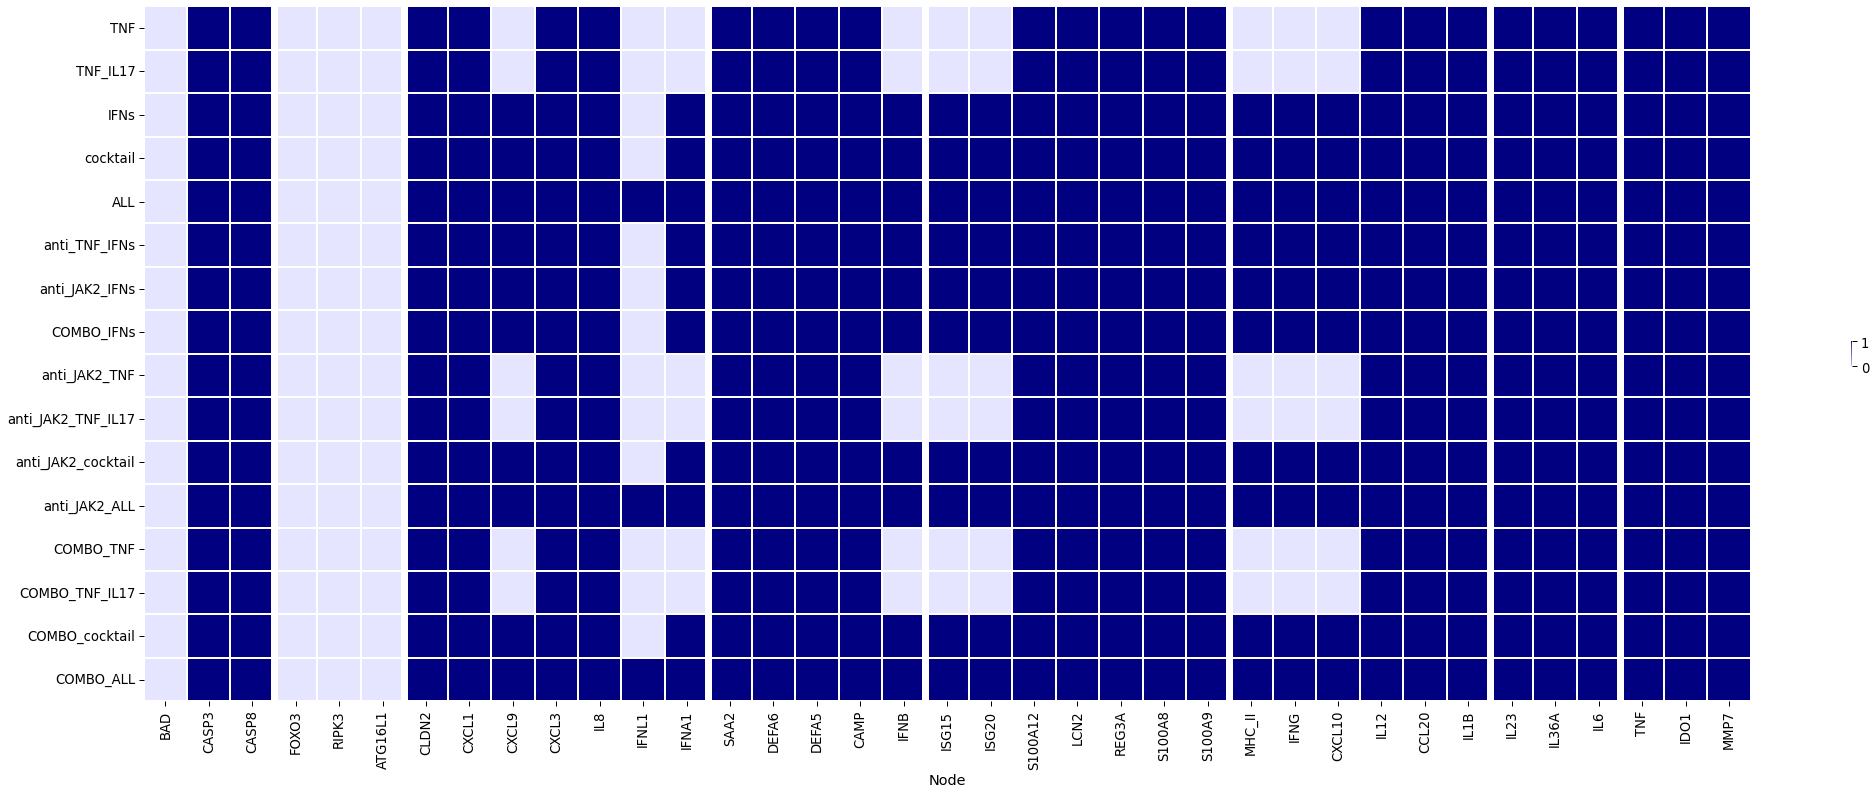

In [44]:
frames = [TNF_fp, TNF_IL17_fp, IFNs_fp, cocktail_fp, ALL_fp, anti_TNF_TNF_df,anti_TNF_TNF_IL17_df, anti_TNF_IFNs_df, anti_JAK2_IFNs_df, COMBO_IFNs_df, anti_TNF_cocktail_df, anti_TNF_ALL_df, anti_JAK2_TNF_df, anti_JAK2_TNF_IL17_df, anti_JAK2_cocktail_df, anti_JAK2_ALL_df, COMBO_TNF_df, COMBO_TNF_IL17_df, COMBO_cocktail_df, COMBO_ALL_df]
all_results = pd.concat(frames, keys=["TNF","TNF_IL17", "IFNs", "cocktail", "ALL", "anti_TNF_TNF","anti_TNF_TNF_IL17","anti_TNF_IFNs", "anti_JAK2_IFNs", "COMBO_IFNs", "anti_TNF_cocktail", "anti_TNF_ALL", "anti_JAK2_TNF", "anti_JAK2_TNF_IL17","anti_JAK2_cocktail", "anti_JAK2_ALL", "COMBO_TNF", "COMBO_TNF_IL17", "COMBO_cocktail", "COMBO_ALL"] )
all_results.index = all_results.index.droplevel(1)
all_results.columns = all_results.columns.droplevel(0)

print("Figure 7. Global simulation and perturbation results")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(all_results, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(3, 0, 5, linewidth=7, c='white')
ax.axvline(6, 0, 5, linewidth=7, c='white')
ax.axvline(13, 0, 5, linewidth=7, c='white')
ax.axvline(18, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(31, 0, 5, linewidth=7, c='white')
ax.axvline(34, 0, 5, linewidth=7, c='white')
#f.figure.savefig('simulations.pdf', dpi = 300)

#f.figure.savefig('simulations.png')

The JAK2 and COMBO perturbations contribute to lowering the number of pro-inflammatory cytokines, however the majority of them are still produced.  This shows why IBD is a complex disease since several pathways triggers the production of pro-inflammatory cytokines, and therefore several perturbations are needed to minimize the secretion of cytokines causing inflammation. On the other side, the combo treatment reaches the same stable state as the JAK2 treatment, which means that only the inhibition of JAK2 has an effect and the combination is not synergistic. When inhibiting TNF alone, the model is not able to reach a stable state.

Potential advantages with fixed drug combinations are; increased compliance, synergy and increased efficacy. However, there are also some potential disadvantages including; increased toxicity, inflexible fixed dose ratio, incompatible pharmacokinetics, and physician and pharmacist ignorance of content. Hence, if the advantages outweigh the added risks of consuming 2 or more drugs, and combinations should only be used if each component necessary for the desired outcome (https://pubmed.ncbi.nlm.nih.gov/7049658/)



## Prediction of mutation combinations with Pint


The attractor analysis performed with bioLQM and various initial conditions resulted in 4 stable states, where several of the inflammatory markers were ON in all the states. Since IBD is an inflammation-based disease, its our goal to reduce inflammation and potentially treat IBD. In this section, single or double, activating or inhibiting, perturbations are performed to inhibit several pro-inflammatory cytokines.

In [51]:
#Define Inflammation markers to be ON --> Opposite of what we want to achieve
Active_infl = ['CLDN2=0', 'CXCL1=1','CXCL3=1', 'IL8=1', 'DEFA6=1', 'DEFA5=1', 'CAMP=1','IFNB=1','ISG15=1', 'ISG20=1', 'S100A12=1', 'LCN2=1', 'S100A8=1', 'S100A9=1', 'MHC_II=1', 'IFNG=1', 'IL12=1', 'CCL20=1', 'REG3A=1' ,'IL1B=1', 'IL23=1', 'IL36A=1', 'IL6=1', 'TNF=1']

#'IFNL1=1',  

In [55]:
%%capture

#capture suppresses unwanted outputs

#Create new list
pint_mutations = []

#Setting initial conditions
n = pint_model.having({'IL22R':1,'IL17R':1,'TNFRSF1A':1, 'IFNGR':1, 'IFNAR' :1, 'NOD1' :1, 'NOD2' :1,'TLR3':1,'TLR2' :1,'TLR4':1, 'TLR5':1, 'IL1R':1, 'IFNLR':1})

#Finding mutations that will not allow activation of the inflammatory markers
for g in Active_infl:
    mutations = list(n.oneshot_mutations_for_cut(g, maxsize=2))
    pint_mutations.extend(mutations)

In [60]:
import collections   


#Count number of markers suggested to be perturbed and create table
count = collections.Counter(tuple(sorted(x.items())) for x in pint_mutations)
combo_count = pd.DataFrame(list(count.items()),columns = ['Combo', 'Number of inflammatory markers'])

#Sort the table after number of markers perturbed
combo_count.sort_values(by=['Number of inflammatory markers'], ascending= False)

#Create heading
print("Table 3. Pint perturbation analysis under ALL stimulated conditions")


#Hide the indexes
combo_count.style.hide_index()

Table 3. Pint perturbation analysis under ALL stimulated conditions


Combo,Number of inflammatory markers
"(('STAT3', 0),)",4
"(('PTPN2', 1),)",8
"(('AKT', 0), ('IL22R', 0))",4
"(('IL22R', 0), ('PTPA', 1))",4
"(('IL22R', 0), ('mTORC1', 0))",4
"(('IL22R', 0), ('TSC1', 1))",4
"(('NFKB', 0), ('STAT3', 0))",2
"(('NFKB', 0), ('PTPN2', 1))",3
"(('IKBKB', 0), ('STAT3', 0))",2
"(('IKBKB', 0), ('PTPN2', 1))",3


The results from the Pint perturbation analysis are presented in Table 3. The results show that the activation of PTPN2 is predicted to inhibit the activation of 9 inflammatory markers. An idea would therefore be to either inactivate its repressor or activate its transcription to reduce pathogenesis by altering the pro-inflammatory environment. Moreover, Interferon lambda (IFNL1) is not included as an inflammatory marker in this analysis since the entity causes problems when trying to run the code. This could indicate that Pint cannot predict any perturbations that will turn OFF IFNL1, since it is already OFF under our specified conditions. This may cause problems for Pint since IFNL1 migth be uncontrollable. To test this we try out the reachability function with Pint.

In [27]:
n.reachability("IFNL1=1")

True

In [28]:
n.reachability("IFNL1=0")

True

The reachability function shows that IFNL1 can only be OFF under our specified intial conditions, and may therefore cause problems when added to the inflammatory markers list where Pint tries to predict perturbations.

### Modified attractor analysis

Now, a new attractor analysis is executed with altered initial conditions to attempt to reduce the number of active inflammatory markers by activating PTPN2 when all inputs are ON.

In [14]:
mod_inpALL = ('PPARG == 1')

mod_ALL_fp = fix_df.query(mod_inpALL) 
mod_ALL_fp = mod_ALL_fp[markers] 
mod_ALL_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

mod_ALL_fp



Empty DataFrame
Columns: [(Apoptosis, BAD), (Apoptosis, CASP3), (Apoptosis, CASP8), (Apoptosis, FOXO3), (Necroptosis, RIPK3), (Autophagy, ATG16L1), (Immune cells, CLDN2), (Immune cells, CXCL1), (Immune cells, CXCL9), (Immune cells, CXCL3), (Immune cells, IL8), (Immune cells, IFNL1), (Immune cells, IFNA1), (Immune cells, SAA2), (Immune cells, DEFA6), (Immune cells, DEFA5), (Immune cells, CAMP), (Immune cells, IFNB), (Immune cells, ISG15), (Immune cells, ISG20), (Immune cells, S100A12), (Immune cells, LCN2), (Immune cells, REG3A), (Immune cells, S100A8), (Immune cells, S100A9), (Immune cells, MHC_II), (Th1, IFNG), (Th1, CXCL10), (Th1, IL12), (Th17/22, CCL20), (Th17/22, IL1B), (Th17/22, IL23), (Th17/22, IL36A), (Th17/22, IL6), (Th17/22, TNF), (Treg, IDO1), (Tissue repair, MMP7)]
Index: []

Not posssible to reach a stable state or trap space when PTPN2 is ON.